In [3]:
#Import libraries
import mne 
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

In [164]:
#Create dictionary with all the data grouped by condition
    
#Create root folder argument for folders to loop through
root_folder = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\Epoched_Data'
os.chdir(root_folder)


DataA = {'EO':{},'EC':{},'INDUCTION':{},'SED_1':{},'SED_2':{},'SED_3':{},'SED_4':{},'EMERGENCE':{}}

for folder in os.listdir(root_folder):
    for filename in os.listdir(folder): 
        file_path = os.path.join(folder, filename)
        with open(file_path,'rb') as g:
            raw = pickle.load(g)
        #Get the participant ID
        ID = filename.split('_',maxsplit=1)[0]
        #Get condition
        cond = '_'.join(filename.split('_')[1:-1])
        if 'EC' in cond:
            cond = 'EC'
        elif 'EO' in cond:
            cond = 'EO'
        #Add array element to dictionary
        DataA[cond][ID] = raw.get_data()
nu_fold = 'M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal' 

with open(nu_fold + '\\DataA.pkl', 'wb') as f:
        pickle.dump(DataA, f)
f.close()

In [134]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB_mne.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataB = raw.copy()

In [151]:
from statistics import mean
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [20]:
%matplotlib qt

root_folder = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataB.pkl"
#Loop through all the data and group the psd by condition, then plot the comparison
psdss = [[0],[0],[0],[0],[0],[0],[0],[0]]
t = 0
for cond in DataA.keys():
    i = 0
    pitstop = list()
    #if cond not in ['INDUCTION','EMERGENCE', 'SED_2', 'SED_3', 'EC', 'EO']:
    for pers in DataB[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataA[cond][pers],sfreq=500)
        pitstop.append(np.mean(np.mean(psds,axis=0),axis=0))
        i += 1
    psdss[t] = [np.mean(pitstop,axis=0)]
    t += 1 

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

In [4]:
import pandas as pd
import math

In [137]:
print(DataB['EO']['SD5001'])
print(DataA['EO']['SD5001'].shape)

<Epochs |  33 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~5.7 MB, data loaded,
 '1': 33>
(33, 63, 351)


In [5]:
def total_sum(A,B):
    if type(A) == str:
        A = int(float(A))
    if type(B) == str:
        B = int(float(B))
    if math.isnan(A) & math.isnan(B):
        return 0
    elif math.isnan(B):
        return A
    elif math.isnan(A):
        return B
    else:
        return int(A) + int(B)

In [6]:
def find_string_3d(string, arr):
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                if arr[i][j][k] == string:
                    return int(string.split(': ',maxsplit=1)[1])
    return UserWarning("ED score not found")


In [7]:
def get_dimensions(arr):
    if isinstance(arr, list):
        dimensions = [len(arr)]
        sub_dimensions = get_dimensions(arr[0])
        if isinstance(sub_dimensions, list):
            dimensions.extend(sub_dimensions)
        return dimensions
    else:
        return UserWarning("Not a list object")


In [134]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\MainAnal\\SpectrumAnal\\DataA.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

In [136]:
#Apply 50hz notch filter
from scipy import signal
import numpy as np

for key in DataA.keys():
    for per in DataA[key].keys():
        data = DataA[key][per]
        
        # Define the notch filter parameters
        fs = 500  # Sampling rate
        f0 = 45  # Notch frequency
        Q = 30  # Quality factor

        # Design the notch filter
        b, a = signal.iirnotch(f0, Q, fs)

        # Apply the notch filter to the data and replace the previous data
        DataA[key][per] = signal.filtfilt(b, a, data)
#Save the new file
with open(os.path.join('M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\LowPassedData',"DataA_LowPassed.pkl"), 'wb') as f:
    pickle.dump(DataA, f) 

f.close()
    

In [137]:
file_path = "M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataAnalysis\\EEG_analysis\\PreProc\\LowPassedData\\DataA_LowPassed.pkl"
with open(file_path,'rb') as g:
            raw = pickle.load(g)
DataA = raw.copy()

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spe

C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\andrlm\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


TypeError: 'numpy.float64' object is not iterable

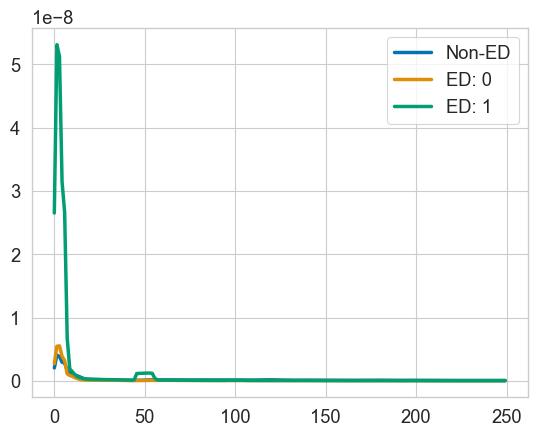

In [140]:
#### Compare ego dissolution vs. non-ego dissolution ####
import math

#First, import ratings of ego dissolution and copy DataA to a new dictionary
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
DataAd = DataA.copy()

#Shorten all epochs to the last minute of recording
for cond in DataAd.keys():
    for pers in DataAd[cond].keys():
        DataAd[cond][pers] = DataAd[cond][pers][-7:-1]

#Label ED or non-ED and use this to compute the psd and plot the four graphs
ket_conds = ['SED_1','SED_2','SED_3','SED_4']
Q_corresp = [91,98,105,112]
psdss = {'Non-ED':[],'ED: 0':[], 'ED: 1':[], 'ON: 0':[], 'ON: 1':[], 'ED_ON: 0':[], 'ED_ON: 1':[]}
for cond in DataAd.keys():
    for pers in DataAd[cond]:
        psds, sfreq = mne.time_frequency.psd_array_multitaper(DataAd[cond][pers],sfreq=500)
        if pers == '2001':
            pers = 2001
        if cond in ket_conds:
            ED_sum = df.loc[Q_corresp[ket_conds.index(cond)],pers]
            if ED_sum == ED_sum and ON_sum == ON_sum:
                if ED_sum == 0 and ON_sum == 0:
                    psdss['ED_ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                elif ED_sum == 1 and ON_sum == 1:
                    psdss['ED_ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    if ED_sum == ED_sum:
                        if type(ED_sum) == str:
                            ED_sum = int(float(ED_sum))
                        else:
                            ED_sum = int(ED_sum)
                        if ED_sum == 0:
                            psdss['ED: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                        else:
                            psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
                    ON_sum = df.loc[Q_corresp[ket_conds.index(cond)]+1,pers]
                    if ON_sum == ON_sum:
                        if type(ON_sum) == str:
                            ON_sum = int(float(ON_sum))
                        else:
                            ON_sum = int(ON_sum)
                        if ON_sum == 0:
                            psdss['ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                        else:
                            psdss['ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ED_sum == ED_sum:
                if type(ED_sum) == str:
                    ED_sum = int(float(ED_sum))
                else:
                    ED_sum = int(ED_sum)
                if ED_sum == 0:
                    psdss['ED: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ED: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
            elif ON_sum == ON_sum:
                if type(ON_sum) == str:
                    ON_sum = int(float(ON_sum))
                else:
                    ON_sum = int(ON_sum)
                if ON_sum == 0:
                    psdss['ON: 0'].append(np.mean(np.mean(psds,axis=0),axis=0))
                else:
                    psdss['ON: 1'].append(np.mean(np.mean(psds,axis=0),axis=0))
        else: 
            psdss['Non-ED'].append(np.mean(np.mean(psds,axis=0),axis=0))

import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("colorblind")

sns.lineplot(x=sfreq,y=list(np.mean(psdss['Non-ED'],axis=0).T),label='Non-ED')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED: 0'],axis=0).T),label='ED: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED: 1'],axis=0).T),label='ED: 1')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ON: 0'],axis=0).T),label='ON: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ON: 1'],axis=0).T),label='ON: 1')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 0'],axis=0).T),label='ED_ON: 0')
sns.lineplot(x=sfreq,y=list(np.mean(psdss['ED_ON: 1'],axis=0).T),label='ED_ON: 1')
plt.yscale('log')
plt.xlabel('Frequencies')
plt.ylabel('log mV')
plt.legend()
plt.show()


In [111]:
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
df.head()
df.loc[2,2001]

23.0

In [94]:
df = pd.read_excel("M:\\pc\\Dokumenter\\GitHub\\Ketamine-project\\DataCollection\\QuestionnaireData\\QuestionnaireScores.xlsx")
print(df)
df = df.dropna()
print(df)

                          Participant ID    SD5001    SD5002    SD5007 SD5008  \
0                                    Sex         0         0         0      0   
1                                 Gender         0         0         0      0   
2                                    Age        23        28        24     27   
3                                 Height       184       183       168    198   
4                                 Weight        75      78.5        60     90   
..                                   ...       ...       ...       ...    ...   
200                              MEQ_Awe         5         5         3      2   
201             MEQ_Part_of_ulti_reality         2         5         3      2   
202  MEQ_Diff_convey_exp_to_unexp_people         5         5         5      5   
203                        MEQ_Happiness         1         5         4      2   
204                              MEQ_Avg  3.366667  4.483333  3.733333    3.2   

       SD5009 SD5010   2001

In [68]:
print(psdss['ON: 0'])

[]
